In [568]:
import os
import sys
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from scipy.special import expit

import torch
import gpytorch

import import_ipynb
from model import ModelLocBias as Model

In [569]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, minmax_scale, \
    StandardScaler, Normalizer, QuantileTransformer, PowerTransformer

In [570]:
%config InlineBackend.figure_format = 'retina'
sns.set()

In [571]:
FIG_FOLDER = 'fig'
SOURCE_FOLDER = os.path.join('data', 'source')
BACKUP_FOLDER = os.path.join('data', 'backup')
print(f"The source folder is: {os.path.abspath(SOURCE_FOLDER)}")
print(f"The figure folder is: {os.path.abspath(FIG_FOLDER)}")
print(f"The backup folder is: {os.path.abspath(BACKUP_FOLDER)}")

# Create folders
for f in SOURCE_FOLDER, FIG_FOLDER, BACKUP_FOLDER:
    os.makedirs(f, exist_ok=True)

The source folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/source
The figure folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/fig
The backup folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/backup


In [572]:
positions = ['1195_131_vs_1195_517', '469_131_vs_469_517']
df_paths = [f"{BACKUP_FOLDER}/df_fit_overallA_ModelLocBias.csv"] \
    + [f"{BACKUP_FOLDER}/df_fit_overallB_ModelLocBias_{pos}.csv" for pos in positions]
df_paths

['data/backup/df_fit_overallA_ModelLocBias.csv',
 'data/backup/df_fit_overallB_ModelLocBias_1195_131_vs_1195_517.csv',
 'data/backup/df_fit_overallB_ModelLocBias_469_131_vs_469_517.csv']

# Try with one dataset

In [573]:
df_fit = pd.read_csv(df_paths[0], index_col=0)
for c in ("date_begin", "date_end"):
    df_fit[c] = pd.to_datetime(df_fit[c])
df_fit.drop(df_fit.filter(regex="Unname"),axis=1, inplace=True)
df_fit

,distortion,precision,risk_aversion,loc_bias,date_begin,date_end,monkey,condition,n
0,1.327775,0.285684,0.206004,0.051842,2020-02-22,2020-06-22,Ala,gain,8326
0,1.051529,0.231330,-0.582592,-0.071694,2020-02-22,2020-06-22,Ala,loss,8285
0,0.768159,0.447276,0.075584,-0.936214,2020-02-22,2020-06-22,Alv,gain,9996
0,0.462213,0.229596,-0.398661,-0.675575,2020-02-22,2020-06-22,Alv,loss,9988
0,0.915509,0.492803,-0.109141,-0.117283,2020-02-22,2020-06-22,Bar,gain,10361
0,0.769959,0.189979,-0.640682,-0.121369,2020-02-22,2020-06-22,Bar,loss,10365
0,0.250000,1.612589,0.083753,-10.000000,2020-02-23,2020-06-22,Ola,gain,5235
0,0.250000,0.330200,-0.903815,-1.570219,2020-02-23,2020-06-22,Ola,loss,5237
0,0.610421,0.704556,0.750000,2.518428,2020-05-20,2020-06-18,Yin,gain,389
0,0.888765,2.477640,0.571941,10.000000,2020-05-20,2020-06-19,Yin,loss,382


In [574]:
df_elo = pd.read_csv(os.path.join(BACKUP_FOLDER, "df_elo.csv"), index_col=0)
df_elo.index = pd.to_datetime(df_elo.index)
df_elo

,nem,yak,ner,yoh,nen,wot,pac,las,anu,ola,...,olg,jea,pat,bar,ces,lad,ber,dor,eri,fic
date,,,,,,,,,,,,,,,,,,,,,
2016-10-25,1024,1009,1018,984,991,1010,991,982,991,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-26,1032,1009,1018,1003,991,1010,982,964,991,999,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-27,1032,1009,1018,1003,991,1010,982,956,991,999,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-28,1041,1009,1018,1003,991,1010,982,956,991,999,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-29,1063,1009,1018,1011,991,1010,975,941,984,1008,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-21,938,1243,961,840,1018,1234,1379,713,1117,1287,...,933,760,841,1083,837,753,743,766,702,579
2020-10-22,970,1243,962,840,1018,1234,1347,716,1105,1296,...,935,755,841,1070,832,753,743,795,702,566
2020-10-23,971,1243,970,840,1018,1234,1347,735,1105,1296,...,920,751,841,1072,838,753,758,773,668,566


In [575]:
elo = []

for _, row in df_fit.iterrows():
        
    m = row.monkey
    begin = row.date_begin
    end = row.date_end
        
    df_elo_m = df_elo[m.lower()]
    df_elo_m = df_elo_m[(df_elo_m.index >= begin) & (df_elo_m.index <= end)]
    elo.append(np.mean(df_elo_m))
        

df_fit['elo'] = elo
df_fit

,distortion,precision,risk_aversion,loc_bias,date_begin,date_end,monkey,condition,n,elo
0,1.327775,0.285684,0.206004,0.051842,2020-02-22,2020-06-22,Ala,gain,8326,1106.786885
0,1.051529,0.231330,-0.582592,-0.071694,2020-02-22,2020-06-22,Ala,loss,8285,1106.786885
0,0.768159,0.447276,0.075584,-0.936214,2020-02-22,2020-06-22,Alv,gain,9996,1096.295082
0,0.462213,0.229596,-0.398661,-0.675575,2020-02-22,2020-06-22,Alv,loss,9988,1096.295082
0,0.915509,0.492803,-0.109141,-0.117283,2020-02-22,2020-06-22,Bar,gain,10361,998.040984
0,0.769959,0.189979,-0.640682,-0.121369,2020-02-22,2020-06-22,Bar,loss,10365,998.040984
0,0.250000,1.612589,0.083753,-10.000000,2020-02-23,2020-06-22,Ola,gain,5235,1426.305785
0,0.250000,0.330200,-0.903815,-1.570219,2020-02-23,2020-06-22,Ola,loss,5237,1426.305785
0,0.610421,0.704556,0.750000,2.518428,2020-05-20,2020-06-18,Yin,gain,389,894.800000
0,0.888765,2.477640,0.571941,10.000000,2020-05-20,2020-06-19,Yin,loss,382,895.096774


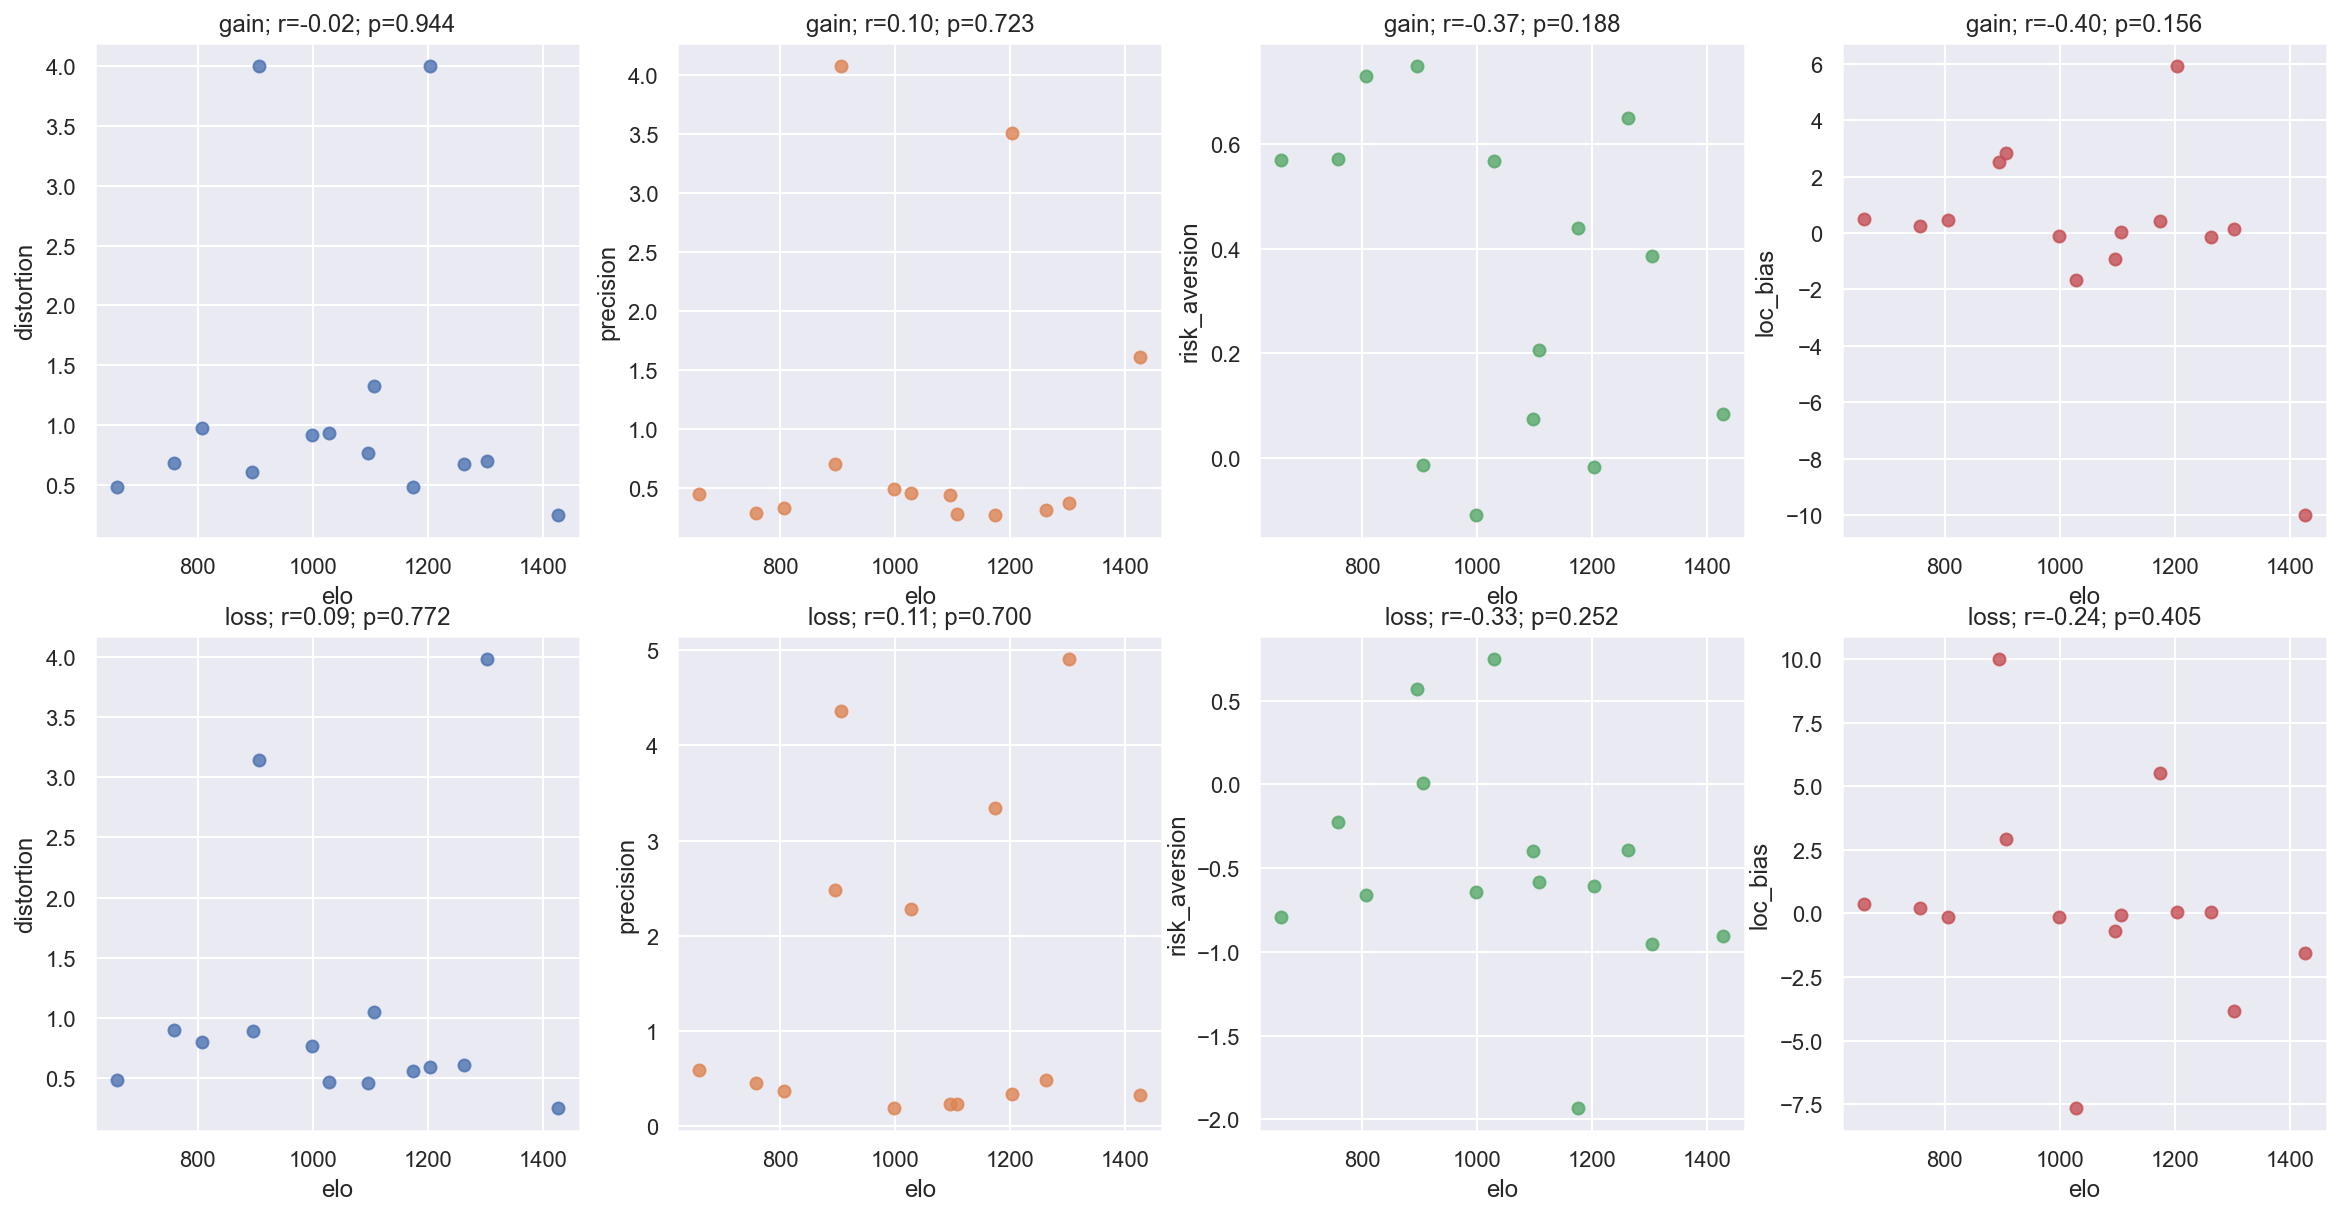

In [576]:
monkeys = df_fit.monkey.unique()
cond = df_fit.condition.unique()
n_param = len(Model.param_labels)

fig, axes = plt.subplots(figsize=(20, 10), nrows=2, ncols=n_param)

for i, cd in enumerate(cond):
    
    df = df_fit[df_fit.condition == cd]
    
    for j, pr in enumerate(Model.param_labels):
            
        r, p = scipy.stats.pearsonr(df.elo.values, df[pr].values)
           
        ax = axes[i, j]
        t = f"{cd}; r={r:.2f}; p={p:.3f}"
        ax.set_title(t)
            
        sns.regplot(x="elo", y=pr, data=df, color=f"C{j}", ax=ax, fit_reg=False)

In [577]:
n_param = len(Model.param_labels)
n_monkey = len(df_fit.monkey.unique())
n_cond = len(df_fit.condition.unique())
param = np.zeros((n_monkey, n_param*n_cond))
elo = np.zeros(n_monkey)
monkeys = np.zeros(n_monkey, dtype=str)
for i, (m, df_m) in enumerate(df_fit.groupby(by="monkey")):
    pr_m = [df_m[df_m.condition == cd].loc[0, pr] for pr in Model.param_labels for cd in df_fit.condition.unique()]
    param[i] = pr_m
    elo[i] = df_m["elo"].values[0]
    monkeys[i] = m

In [578]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [579]:
def give_rank(value, list_value):
    list_value = list(list_value)
    if value in list_value:
        list_value = list_value.copy()
        list_value.remove(value)
    for i, v_i in enumerate(sorted(list_value)):
        if value < v_i:
            return i + 1
    return len(list_value) + 1

In [580]:
give_rank(3, [1, 3, 2, 0])

4

In [581]:
print(len(monkeys))

14


In [582]:
for i, m in enumerate(monkeys): 
    idx = list(range(param.shape[0]))
    test_idx = i
    X_idx = idx.copy()
    X_idx.remove(test_idx)

    X = param[np.asarray(X_idx)]
    y = elo[np.asarray(X_idx)]

    X_test = param[test_idx].reshape(-1, 1).T
    y_true = elo[test_idx]

    kernel = C(1.0, (1e-3, 1e2)) * RBF(10, (1e-2, 1e2))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
    gp.fit(X, y)
    y_pred, sigma = gp.predict(X_test, return_std=True)
    rank_pred = give_rank(y_pred[0], elo[X_idx])
    rank_true = give_rank(y_true, elo[X_idx])
    print(f"ELO pred = {y_pred[0]:.2f} (+/-{sigma[0]:.2f}); ELO true = {y_true:.2f}; Err pred = {y_true-y_pred[0]:.2f}")
    print(f"Rank pred = {rank_pred}; Rank true: {rank_true}")
    if rank_pred == rank_true:
        print("SUCCESS!!!")
    print()

ELO pred = 834.54 (+/-0.53); ELO true = 1262.41; Err pred = 427.87
Rank pred = 4; Rank true: 12

ELO pred = 783.81 (+/-4.76); ELO true = 1106.79; Err pred = 322.97
Rank pred = 3; Rank true: 9

ELO pred = 459.77 (+/-9.01); ELO true = 1096.30; Err pred = 636.53
Rank pred = 1; Rank true: 8



/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound

ELO pred = 0.00 (+/-10.00); ELO true = 1174.39; Err pred = 1174.39
Rank pred = 1; Rank true: 10

ELO pred = 1193.45 (+/-5.02); ELO true = 998.04; Err pred = -195.41
Rank pred = 10; Rank true: 6

ELO pred = 1045.67 (+/-3.77); ELO true = 757.80; Err pred = -287.86
Rank pred = 7; Rank true: 2



/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound

ELO pred = 501.80 (+/-6.66); ELO true = 659.44; Err pred = 157.65
Rank pred = 1; Rank true: 1
SUCCESS!!!

ELO pred = 0.00 (+/-10.00); ELO true = 906.33; Err pred = 906.33
Rank pred = 1; Rank true: 5

ELO pred = 0.00 (+/-10.00); ELO true = 1028.38; Err pred = 1028.38
Rank pred = 1; Rank true: 7



/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound

ELO pred = 0.00 (+/-10.00); ELO true = 1426.31; Err pred = 1426.31
Rank pred = 1; Rank true: 14

ELO pred = 0.00 (+/-10.00); ELO true = 1203.29; Err pred = 1203.29
Rank pred = 1; Rank true: 11

ELO pred = 0.00 (+/-10.00); ELO true = 1303.14; Err pred = 1303.14
Rank pred = 1; Rank true: 13

ELO pred = 0.00 (+/-10.00); ELO true = 894.80; Err pred = 894.80
Rank pred = 1; Rank true: 4

ELO pred = 900.95 (+/-5.43); ELO true = 806.79; Err pred = -94.17
Rank pred = 4; Rank true: 3



/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


# Do it for all datasets

In [583]:
def gp_regress(X, y, X_test):
    kernel = C(1.0, (1e-3, 1e8)) * RBF(10, (1e-2, 1e2))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gp.fit(X, y)
    y_pred, sigma = gp.predict(X_test, return_std=True)
    return y_pred 

In [584]:
n_success = {}

for df_p in df_paths:
    print(df_p)
    print("*" * 30)
    print()
    
    # Import fit data
    df_fit = pd.read_csv(df_p, index_col=0)
    for c in ("date_begin", "date_end"):
        df_fit[c] = pd.to_datetime(df_fit[c])
    df_fit.drop(df_fit.filter(regex="Unname"),axis=1, inplace=True)
    
    # Add elo
    elo = []

    for _, row in df_fit.iterrows():

        m = row.monkey
        begin = row.date_begin
        end = row.date_end

        df_elo_m = df_elo[m.lower()]
        df_elo_m = df_elo_m[(df_elo_m.index >= begin) & (df_elo_m.index <= end)]
        elo.append(np.mean(df_elo_m))
        
    df_fit['elo'] = elo
    
    # Regression
    n_param = len(Model.param_labels)
    n_monkey = len(df_fit.monkey.unique())
    n_cond = len(df_fit.condition.unique())
    param = np.zeros((n_monkey, n_param*n_cond))
    elo = np.zeros(n_monkey)
    monkeys = np.zeros(n_monkey, dtype=object)
    for i, (m, df_m) in enumerate(df_fit.groupby(by="monkey")):
        pr_m = [df_m[df_m.condition == cd].loc[0, pr] for pr in Model.param_labels for cd in df_fit.condition.unique()]
        param[i] = pr_m
        elo[i] = df_m["elo"].values[0]
        monkeys[i] = m
    
    n_success[df_p] = 0 
        
    for i, m in enumerate(monkeys): 
        idx = list(range(param.shape[0]))
        test_idx = i
        X_idx = idx.copy()
        X_idx.remove(test_idx)

        X = param[np.asarray(X_idx)]
        y = elo[np.asarray(X_idx)]

        X_test = param[test_idx].reshape(-1, 1).T
        y_true = elo[test_idx]

        y_pred = gp_regress(X=X, y=y, X_test=X_test)
        
        rank_pred = give_rank(y_pred[0], elo[X_idx])
        rank_true = give_rank(y_true, elo[X_idx])
        print(f"ELO pred = {y_pred[0]:.2f} (+/-{sigma[0]:.2f}); ELO true = {y_true:.2f}; Err pred = {y_true-y_pred[0]:.2f}")
        print(f"{m} Rank pred = {rank_pred}; Rank true: {rank_true}")
        if rank_pred == rank_true:
            print("SUCCESS!!!")
            n_success[df_p] += 1
        print()
    print(f'{df_p}: {n_success[df_p]} success')

print("*" *10)
print()
for k, v in n_success.items():
    print(k, v)

data/backup/df_fit_overallA_ModelLocBias.csv
******************************

ELO pred = 843.72 (+/-5.43); ELO true = 1262.41; Err pred = 418.69
Abr Rank pred = 4; Rank true: 12

ELO pred = 897.94 (+/-5.43); ELO true = 1106.79; Err pred = 208.85
Ala Rank pred = 5; Rank true: 9

ELO pred = 1549.02 (+/-5.43); ELO true = 1096.30; Err pred = -452.73
Alv Rank pred = 14; Rank true: 8

ELO pred = 5.31 (+/-5.43); ELO true = 1174.39; Err pred = 1169.08
Anu Rank pred = 1; Rank true: 10

ELO pred = 1093.12 (+/-5.43); ELO true = 998.04; Err pred = -95.08
Bar Rank pred = 7; Rank true: 6

ELO pred = 1197.18 (+/-5.43); ELO true = 757.80; Err pred = -439.38
Ces Rank pred = 10; Rank true: 2

ELO pred = 679.99 (+/-5.43); ELO true = 659.44; Err pred = -20.54
Dor Rank pred = 1; Rank true: 1
SUCCESS!!!

ELO pred = 2.39 (+/-5.43); ELO true = 906.33; Err pred = 903.94
Nem Rank pred = 1; Rank true: 5

ELO pred = 2.21 (+/-5.43); ELO true = 1028.38; Err pred = 1026.18
Ner Rank pred = 1; Rank true: 7

ELO pred = 

/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


ELO pred = 0.00 (+/-5.43); ELO true = 861.53; Err pred = 861.53
Yoh Rank pred = 1; Rank true: 4

data/backup/df_fit_overallB_ModelLocBias_1195_131_vs_1195_517.csv: 1 success
data/backup/df_fit_overallB_ModelLocBias_469_131_vs_469_517.csv
******************************

ELO pred = 0.00 (+/-5.43); ELO true = 1239.71; Err pred = 1239.71
Abr Rank pred = 1; Rank true: 12

ELO pred = 775.30 (+/-5.43); ELO true = 1126.67; Err pred = 351.36
Ala Rank pred = 3; Rank true: 9

ELO pred = 985.39 (+/-5.43); ELO true = 1243.38; Err pred = 257.99
Alv Rank pred = 7; Rank true: 13

ELO pred = 380.49 (+/-5.43); ELO true = 1155.79; Err pred = 775.30
Anu Rank pred = 1; Rank true: 10

ELO pred = 1152.19 (+/-5.43); ELO true = 1038.16; Err pred = -114.02
Bar Rank pred = 9; Rank true: 8

ELO pred = 1019.88 (+/-5.43); ELO true = 798.20; Err pred = -221.69
Ces Rank pred = 7; Rank true: 3

ELO pred = 972.02 (+/-5.43); ELO true = 667.82; Err pred = -304.20
Dor Rank pred = 6; Rank true: 1

ELO pred = 364.06 (+/-5.4

## Using gpytorch

In [585]:
def gpy_regress(X, y, X_test, n_iter):
    
    train_x = torch.from_numpy(X)
    train_y = torch.from_numpy(y)
    test_x = torch.from_numpy(X_test)
    
    # We will use the simplest form of GP model, exact inference
    class ExactGPModel(gpytorch.models.ExactGP):
        
        def __init__(self, train_x, train_y, likelihood):
            super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
            self.mean_module = gpytorch.means.ConstantMean()
            self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

        def forward(self, x):
            mean_x = self.mean_module(x)
            covar_x = self.covar_module(x)
            return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

    # initialize likelihood and model
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = ExactGPModel(train_x, train_y, likelihood)

    # Find optimal model hyperparameters
    model.train()
    likelihood.train()

    # Use the adam optimizer
    optimizer = torch.optim.Adam([
        {'params': model.parameters()},  # Includes GaussianLikelihood parameters
    ], lr=0.1)

    # "Loss" for GPs - the marginal log likelihood
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

    iterator = tqdm(range(n_iter))
    for i in iterator:
        # Zero gradients from previous iteration
        optimizer.zero_grad()
        # Output from model
        output = model(train_x)
        # Calc loss and backprop gradients
        loss = -mll(output, train_y)
        loss.backward()
#         print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
#             i + 1, training_iter, loss.item(),
#             model.covar_module.base_kernel.lengthscale.item(),
#             model.likelihood.noise.item()
#         ))
        iterator.set_postfix(loss=loss.item())
        optimizer.step()
    
    # Get into evaluation (predictive posterior) mode
    model.eval()
    likelihood.eval()

    # Test points are regularly spaced along [0,1]
    # Make predictions by feeding model through likelihood
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        # test_x = torch.linspace(0, 1, 51)
        observed_pred = likelihood(model(test_x))

    lower, upper = observed_pred.confidence_region()
    mean = observed_pred.mean
    return mean.numpy(), lower.numpy(), upper.numpy()

In [586]:
# df_paths = "data/backup/df_fit_overallB_ModelLocBias_469_131_vs_469_517.csv", #"data/backup/df_fit_overallB_ModelLocBias_469_131_vs_469_517.csv",

In [587]:
df_rgr_list = []
for df_p in df_paths:

    # Import fit data
    df_fit = pd.read_csv(df_p, index_col=0)
    for c in ("date_begin", "date_end"):
        df_fit[c] = pd.to_datetime(df_fit[c])
    df_fit.drop(df_fit.filter(regex="Unname"),axis=1, inplace=True)

    # Add elo
    elo = []

    for _, row in df_fit.iterrows():

        m = row.monkey
        begin = row.date_begin
        end = row.date_end

        df_elo_m = df_elo[m.lower()]
        df_elo_m = df_elo_m[(df_elo_m.index >= begin) & (df_elo_m.index <= end)]
        elo.append(np.mean(df_elo_m))

    df_fit['elo'] = elo

    n_param = len(Model.param_labels)
    n_monkey = len(df_fit.monkey.unique())
    n_cond = len(df_fit.condition.unique())
    param = np.zeros((n_monkey, n_param*n_cond))
    elo = np.zeros(n_monkey)
    monkeys = np.zeros(n_monkey, dtype=object)
    for i, (m, df_m) in enumerate(df_fit.groupby(by="monkey")):
        pr_m = [df_m[df_m.condition == cd].loc[0, pr] 
                for pr in Model.param_labels 
                for cd in df_fit.condition.unique()]
        param[i] = pr_m
        elo[i] = df_m["elo"].values[0]
        monkeys[i] = m
        
    df_rgr = pd.DataFrame()
    df_rgr["monkey"] = monkeys
    df_rgr["elo"] = elo
    param_labels = [f"{pr}-{cd}" for pr in Model.param_labels for cd in df_fit.condition.unique()]

    for i, pr in enumerate(param_labels):
        df_rgr[pr] = param[:, i]
    df_rgr_list.append(df_rgr)

In [588]:
def run_inference(df_rgr, n_iter):
    
#     for i in range(2):
#         for func in np.min, np.max:
#             to_remove = df_rgr.elo == func(df_rgr.elo)
#             print("Remove:", df_rgr[to_remove].monkey)
#             df_rgr = df_rgr.drop(df_rgr[to_remove].index, axis=0)
    
    train_columns_raw = [c for c in df_rgr.columns if not c.startswith("z_") 
                         and c != 'monkey']
    
    X = df_rgr.loc[:, train_columns_raw].values
    z_score = RobustScaler(quantile_range=(25, 75)).fit_transform(X)
    # z_score =  Normalizer().fit_transform(X)
    # z_score =  MinMaxScaler().fit_transform(X)
    # z_score = QuantileTransformer(output_distribution='normal').fit_transform(X)
    # z_score = QuantileTransformer(output_distribution='uniform').fit_transform(X)
    # z_score = PowerTransformer(method='yeo-johnson').fit_transform(X)
    # z_score = StandardScaler().fit_transform(X)
    for i, col in enumerate(train_columns_raw):
        col_zscore = 'z_' + col
        df_rgr = df_rgr.assign(**{col_zscore: z_score[:, i]})
    
    rank_actual = np.zeros(len(df_rgr))
    rank_prediction = np.zeros(len(df_rgr))

    y_actual = np.zeros(len(df_rgr))
    y_prediction = np.zeros(len(df_rgr))

    n_success = 0

    y_column = "z_elo"
    X_columns = [c for c in df_rgr.columns if c.startswith("z_") and c != y_column]

    for i, m in enumerate(df_rgr.monkey): 

        X = df_rgr.loc[df_rgr.monkey != m, X_columns].values
        y = df_rgr.loc[df_rgr.monkey != m, [y_column]].values[:, 0]

        X_test = df_rgr.loc[df_rgr.monkey == m, X_columns].values
        y_true = df_rgr.loc[df_rgr.monkey == m, [y_column]].values[0, 0]

        y_pred, lower, upper = gpy_regress(X=X, y=y, X_test=X_test, n_iter=n_iter)
        y_pred, lower, upper = y_pred[0], lower[0], upper[0]

        rank_pred = give_rank(y_pred, y)
        rank_true = give_rank(y_true, y)

        rank_actual[i] = rank_true
        rank_prediction[i] = rank_pred

        y_actual[i] = y_true
        y_prediction[i] = y_pred

        print(f"ELO pred = {y_pred:.2f} ({lower:.2f}, {upper:.2f}); ELO true = {y_true:.2f}; Err pred = {y_true-y_pred:.2f}")
        print(f"{m} Rank pred = {rank_pred}; Rank true: {rank_true}")
        if rank_pred == rank_true:
            print("SUCCESS!!!")
            n_success += 1
        print()
    print("n success", n_success)
    
    return rank_actual, rank_prediction, y_actual, y_prediction

In [589]:
rank_actual, rank_prediction, y_actual, y_prediction = run_inference(df_rgr_list[-1], n_iter=100)

  0%|          | 0/100 [00:00<?, ?it/s]

ELO pred = -0.05 (-1.40, 1.31); ELO true = 0.62; Err pred = 0.66
Abr Rank pred = 8; Rank true: 12



  0%|          | 0/100 [00:00<?, ?it/s]

ELO pred = -0.02 (-1.41, 1.37); ELO true = 0.27; Err pred = 0.29
Ala Rank pred = 8; Rank true: 9



  0%|          | 0/100 [00:00<?, ?it/s]

ELO pred = -0.05 (-1.40, 1.31); ELO true = 0.63; Err pred = 0.67
Alv Rank pred = 8; Rank true: 13



  0%|          | 0/100 [00:00<?, ?it/s]

ELO pred = -0.03 (-1.41, 1.35); ELO true = 0.36; Err pred = 0.39
Anu Rank pred = 8; Rank true: 10



  0%|          | 0/100 [00:00<?, ?it/s]

ELO pred = -0.00 (-1.40, 1.40); ELO true = 0.00; Err pred = 0.00
Bar Rank pred = 8; Rank true: 8
SUCCESS!!!



  0%|          | 0/100 [00:00<?, ?it/s]

ELO pred = 0.05 (-1.29, 1.39); ELO true = -0.73; Err pred = -0.78
Ces Rank pred = 8; Rank true: 3



  0%|          | 0/100 [00:00<?, ?it/s]

ELO pred = 0.08 (-1.17, 1.33); ELO true = -1.13; Err pred = -1.21
Dor Rank pred = 8; Rank true: 1



  0%|          | 0/100 [00:00<?, ?it/s]

ELO pred = 0.08 (-1.19, 1.34); ELO true = -1.07; Err pred = -1.15
Las Rank pred = 8; Rank true: 2



  0%|          | 0/100 [00:00<?, ?it/s]

ELO pred = 0.12 (-1.27, 1.52); ELO true = -0.33; Err pred = -0.46
Nem Rank pred = 8; Rank true: 6



  0%|          | 0/100 [00:00<?, ?it/s]

ELO pred = 0.01 (-1.39, 1.40); ELO true = -0.12; Err pred = -0.13
Ner Rank pred = 8; Rank true: 7



  0%|          | 0/100 [00:00<?, ?it/s]

ELO pred = -0.07 (-1.35, 1.21); ELO true = 1.00; Err pred = 1.07
Ola Rank pred = 8; Rank true: 14



  0%|          | 0/100 [00:00<?, ?it/s]

ELO pred = -0.03 (-1.41, 1.35); ELO true = 0.42; Err pred = 0.45
Oli Rank pred = 8; Rank true: 11



  0%|          | 0/100 [00:00<?, ?it/s]

ELO pred = -0.08 (-1.35, 1.19); ELO true = 1.05; Err pred = 1.13
Pac Rank pred = 8; Rank true: 15



  0%|          | 0/100 [00:00<?, ?it/s]

ELO pred = 0.03 (-1.35, 1.41); ELO true = -0.42; Err pred = -0.45
Yin Rank pred = 8; Rank true: 5



  0%|          | 0/100 [00:00<?, ?it/s]

ELO pred = 0.04 (-1.33, 1.40); ELO true = -0.55; Err pred = -0.58
Yoh Rank pred = 8; Rank true: 4

n success 1


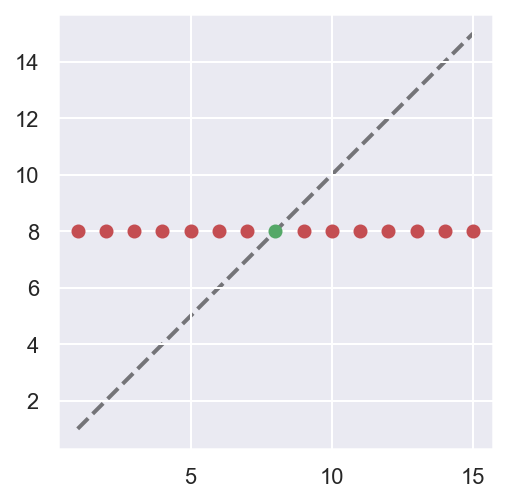

In [590]:
good = rank_actual == rank_prediction
fig, ax = plt.subplots()
ax.scatter(rank_actual[good], rank_prediction[good], color='C2')
ax.scatter(rank_actual[np.invert(good)], rank_prediction[np.invert(good)], color='C3')
ax.plot([1, len(rank_actual)], [1, len(rank_actual)], ls='--', color="black", alpha=0.5, lw=2, zorder=-1)
ax.set_aspect(1)

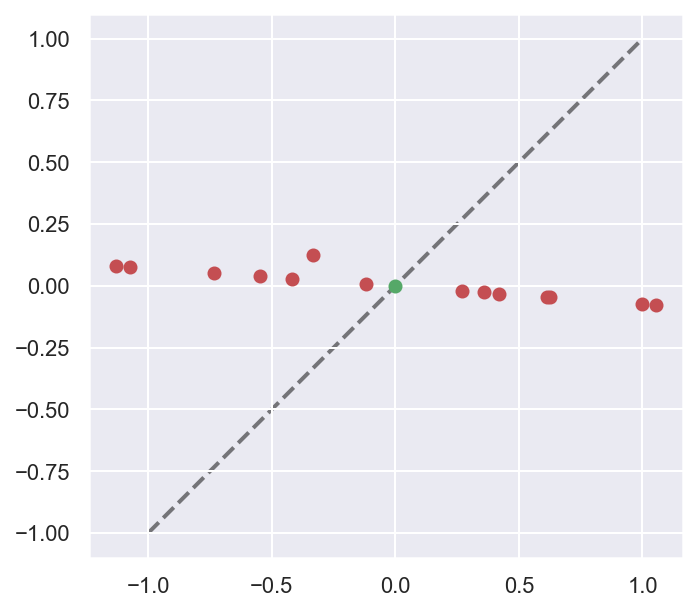

In [591]:
good = rank_actual == rank_prediction
x = y_actual
y = y_prediction
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x[good], y[good], color='C2')
ax.scatter(x[np.invert(good)], y[np.invert(good)], color='C3')
ax.plot([-1, 1], [-1, 1], ls='--', color="black", alpha=0.5, lw=2, zorder=-1)
ax.set_aspect(1)

In [593]:
rank_actual, rank_prediction, y_actual, y_prediction = run_inference(df_rgr_list[1], n_iter=50)

  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = -0.05 (-1.39, 1.30); ELO true = 0.62; Err pred = 0.66
Abr Rank pred = 8; Rank true: 12



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = -0.02 (-1.39, 1.36); ELO true = 0.27; Err pred = 0.29
Ala Rank pred = 8; Rank true: 9



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = -0.05 (-1.39, 1.30); ELO true = 0.63; Err pred = 0.68
Alv Rank pred = 8; Rank true: 13



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = -0.03 (-1.39, 1.34); ELO true = 0.36; Err pred = 0.39
Anu Rank pred = 8; Rank true: 10



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = 0.00 (-1.38, 1.38); ELO true = 0.00; Err pred = -0.00
Bar Rank pred = 8; Rank true: 8
SUCCESS!!!



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = 0.05 (-1.29, 1.38); ELO true = -0.74; Err pred = -0.78
Ces Rank pred = 8; Rank true: 3



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = 0.08 (-1.19, 1.35); ELO true = -1.13; Err pred = -1.21
Dor Rank pred = 8; Rank true: 1



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = 0.08 (-1.20, 1.36); ELO true = -1.08; Err pred = -1.16
Las Rank pred = 8; Rank true: 2



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = 0.02 (-1.35, 1.39); ELO true = -0.34; Err pred = -0.36
Nem Rank pred = 8; Rank true: 6



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = 0.00 (-1.37, 1.38); ELO true = -0.12; Err pred = -0.12
Ner Rank pred = 8; Rank true: 7



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = -0.07 (-1.37, 1.22); ELO true = 1.00; Err pred = 1.07
Ola Rank pred = 8; Rank true: 14



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = -0.03 (-1.40, 1.33); ELO true = 0.42; Err pred = 0.45
Oli Rank pred = 8; Rank true: 11



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = -0.08 (-1.37, 1.21); ELO true = 1.06; Err pred = 1.14
Pac Rank pred = 8; Rank true: 15



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = 0.03 (-1.33, 1.40); ELO true = -0.42; Err pred = -0.45
Yin Rank pred = 8; Rank true: 5



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = 0.04 (-1.32, 1.40); ELO true = -0.54; Err pred = -0.58
Yoh Rank pred = 8; Rank true: 4

n success 1


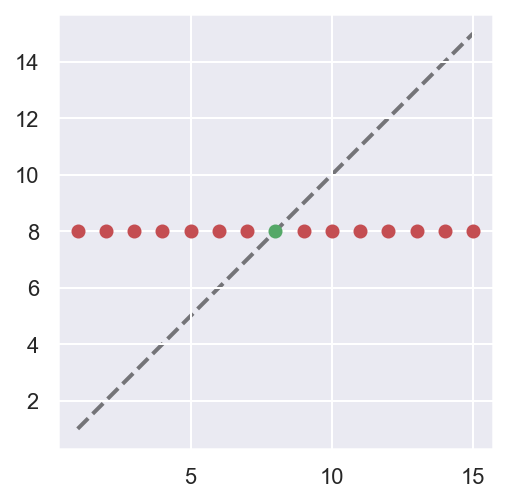

In [594]:
good = rank_actual == rank_prediction
fig, ax = plt.subplots()
ax.scatter(rank_actual[good], rank_prediction[good], color='C2')
ax.scatter(rank_actual[np.invert(good)], rank_prediction[np.invert(good)], color='C3')
ax.plot([1, len(rank_actual)], [1, len(rank_actual)], ls='--', color="black", alpha=0.5, lw=2, zorder=-1)
ax.set_aspect(1)

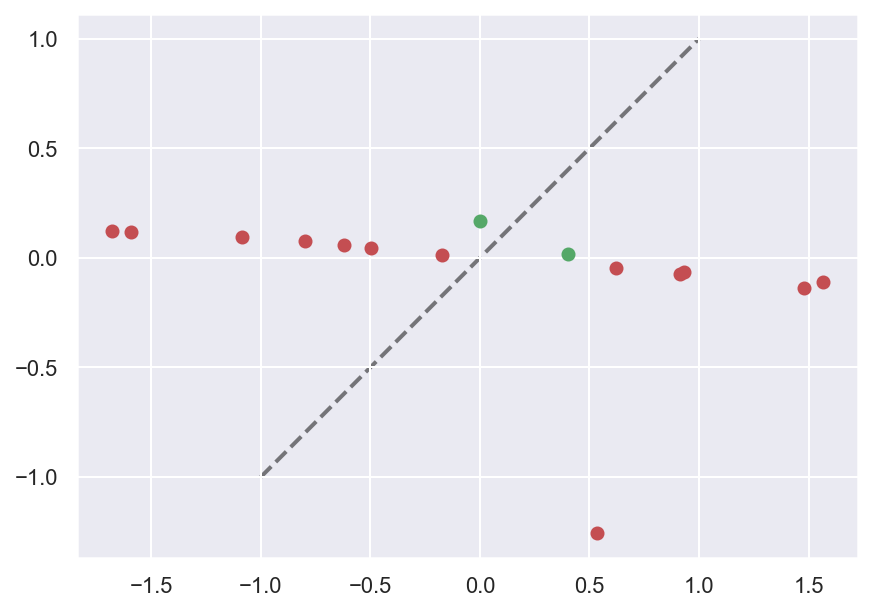

In [441]:
good = rank_actual == rank_prediction
x = y_actual
y = y_prediction
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x[good], y[good], color='C2')
ax.scatter(x[np.invert(good)], y[np.invert(good)], color='C3')
# ax.plot([1, 15], [1, 15], ls='--', color="black", alpha=0.5, lw=2, zorder=-1)
ax.plot([-1, 1], [-1, 1], ls='--', color="black", alpha=0.5, lw=2, zorder=-1)
ax.set_aspect(1)

In [596]:
rank_actual, rank_prediction, y_actual, y_prediction = run_inference(df_rgr_list[0], n_iter=50)

  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = -0.88 (-1.42, -0.34); ELO true = 0.67; Err pred = 1.55
Abr Rank pred = 3; Rank true: 12



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = -0.07 (-1.52, 1.38); ELO true = 0.15; Err pred = 0.22
Ala Rank pred = 8; Rank true: 9



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = -0.07 (-1.52, 1.38); ELO true = 0.11; Err pred = 0.19
Alv Rank pred = 8; Rank true: 8
SUCCESS!!!



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = -0.09 (-1.53, 1.34); ELO true = 0.38; Err pred = 0.47
Anu Rank pred = 8; Rank true: 10



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = -0.04 (-1.50, 1.41); ELO true = -0.22; Err pred = -0.17
Bar Rank pred = 7; Rank true: 6



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = 0.02 (-1.35, 1.39); ELO true = -1.02; Err pred = -1.04
Ces Rank pred = 7; Rank true: 2



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = 0.04 (-1.26, 1.34); ELO true = -1.35; Err pred = -1.39
Dor Rank pred = 7; Rank true: 1



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = -0.02 (-1.46, 1.41); ELO true = -0.52; Err pred = -0.50
Nem Rank pred = 7; Rank true: 5



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = -0.06 (-1.51, 1.40); ELO true = -0.11; Err pred = -0.06
Ner Rank pred = 7; Rank true: 7
SUCCESS!!!



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = -0.15 (-1.46, 1.15); ELO true = 1.22; Err pred = 1.37
Ola Rank pred = 7; Rank true: 14



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = -0.10 (-1.52, 1.33); ELO true = 0.47; Err pred = 0.57
Oli Rank pred = 8; Rank true: 11



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = -0.13 (-1.51, 1.25); ELO true = 0.81; Err pred = 0.93
Pac Rank pred = 7; Rank true: 13



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = -0.02 (-1.45, 1.40); ELO true = -0.56; Err pred = -0.54
Yin Rank pred = 7; Rank true: 4



  0%|          | 0/50 [00:00<?, ?it/s]

ELO pred = -0.00 (-1.39, 1.39); ELO true = -0.86; Err pred = -0.85
Yoh Rank pred = 7; Rank true: 3

n success 2


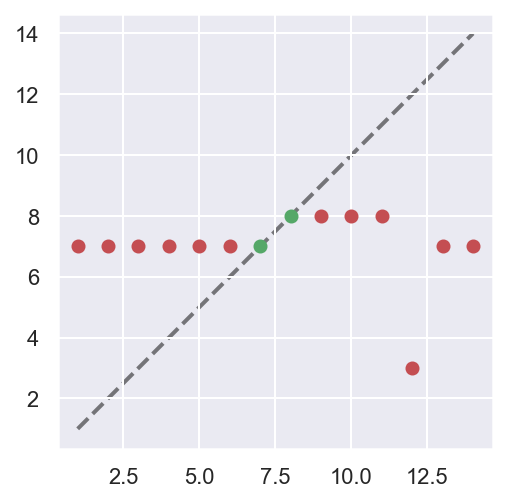

In [597]:
good = rank_actual == rank_prediction
fig, ax = plt.subplots()
ax.scatter(rank_actual[good], rank_prediction[good], color='C2')
ax.scatter(rank_actual[np.invert(good)], rank_prediction[np.invert(good)], color='C3')
ax.plot([1, len(rank_actual)], [1, len(rank_actual)], ls='--', color="black", alpha=0.5, lw=2, zorder=-1)
ax.set_aspect(1)

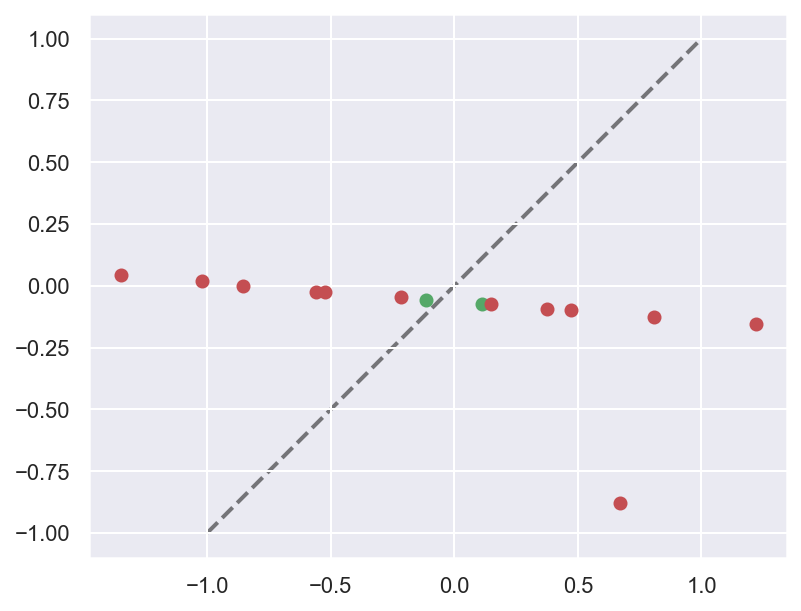

In [598]:
good = rank_actual == rank_prediction
x = y_actual
y = y_prediction
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x[good], y[good], color='C2')
ax.scatter(x[np.invert(good)], y[np.invert(good)], color='C3')
# ax.plot([1, 15], [1, 15], ls='--', color="black", alpha=0.5, lw=2, zorder=-1)
ax.plot([-1, 1], [-1, 1], ls='--', color="black", alpha=0.5, lw=2, zorder=-1)
ax.set_aspect(1)

<AxesSubplot:ylabel='elo'>

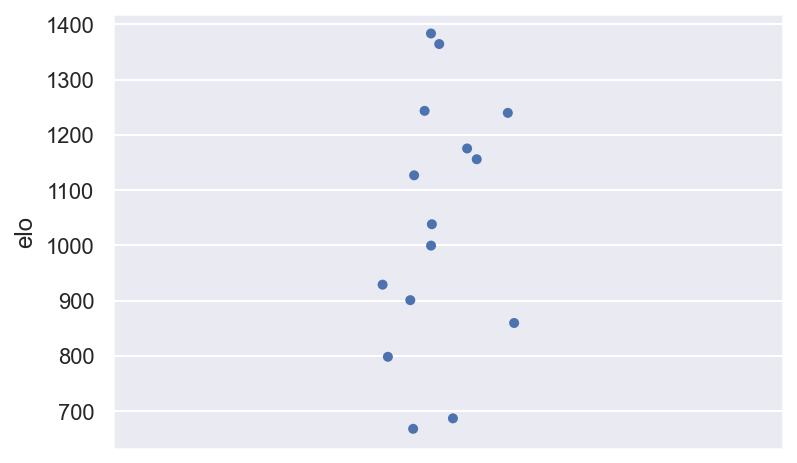

In [599]:
sns.stripplot(y=df_rgr_list[2].elo)

In [600]:
x = df_rgr_list[2].elo
np.mean(x) - 2*np.std(x)

596.2610058370105